Copyright (c) University of Strasbourg. All Rights Reserved.

*Developer & maintainer: Tong Yu*

# TF-Cholec80 *(Tensorflow 1.15)*
-------------------

**EndoNet: A Deep Architecture for Recognition Tasks on Laparoscopic Videos (IEEE Transactions on Medical Imaging, 2016)**
_Twinanda, Andru and Shehata, Sherif and Mutter, Didier and Marescaux, Jacques and De Mathelin, Michel and Padoy, Nicolas_

[![arXiv](https://img.shields.io/badge/arxiv-1602.03012-red)](https://arxiv.org/abs/1602.03012)


**Learning from a tiny dataset of manual annotations: a teacher/student approach for surgical phase recognition (IPCAI 2019)**

_Tong Yu, Didier Mutter, Jacques Marescaux, Nicolas Padoy_

[![arXiv](https://img.shields.io/badge/arxiv-1812.00033-red)](https://arxiv.org/abs/1812.00033)

### Please run this notebook with Tensorflow 1.15.

## Dataset deployment

In [1]:
import matplotlib.pyplot as plt
from tf_cholec80.dataset import make_cholec80
import tensorflow as tf

In [3]:
ds = make_cholec80(
    12, # batch size
    config_path="tf_cholec80/configs/config.json", # path to dataset config file
    video_ids=[0, 3, 78], # ids to pick
    mode="FRAME" # operation mode
)

In [4]:
ds.element_spec

{'frame': TensorSpec(shape=(12, 480, 854, 3), dtype=tf.uint8, name=None),
 'frame_id': TensorSpec(shape=(?,), dtype=tf.int64, name=None),
 'instruments': TensorSpec(shape=(?, 7), dtype=tf.int64, name=None),
 'phase': TensorSpec(shape=(?,), dtype=tf.int64, name=None),
 'total_frames': TensorSpec(shape=(?,), dtype=tf.int64, name=None),
 'video_id': TensorSpec(shape=(?,), dtype=tf.string, name=None),
 'end_flag': TensorSpec(shape=(), dtype=tf.bool, name=None)}

In [5]:
iterator = ds.make_one_shot_iterator()
return_dict = iterator.get_next()

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [6]:
with tf.Session() as sess:
    return_dict_np = sess.run(return_dict)

## Visualisation

In [7]:
PHASES = [
    "Preparation",
    "CalotTriangleDissection",
    "ClippingCutting",
    "GallbladderDissection",
    "GallbladderRetraction",
    "CleaningCoagulation",
    "GallbladderPackaging"
]

INSTRUMENTS = [
    "Grasper",
    "Bipolar",
    "Hook",
    "Scissors",
    "Clipper",
    "Irrigator",
    "SpecimenBag"
]

Text(0.5, 1.0, 'CalotTriangleDissection\nHook ')

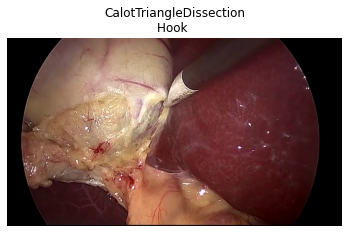

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
frames = return_dict_np["frame"]
ax.imshow(frames[0, :, :, :])
ax.axis("off")
instrument_string = ""
for instr, presence in zip(INSTRUMENTS, return_dict_np["instruments"][0, :]):
    if presence:
        instrument_string += "{} ".format(instr)
ax.set_title("{}\n{}".format(
    (PHASES[return_dict_np["phase"][0]]), instrument_string)
)